In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv


In [142]:
data=pd.read_csv("../input/usa-cers-dataset/USA_cars_datasets.csv")
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [141]:
data.tail()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [122]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


# **Numerical Information**

In [123]:
data.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


# **Correlation:**

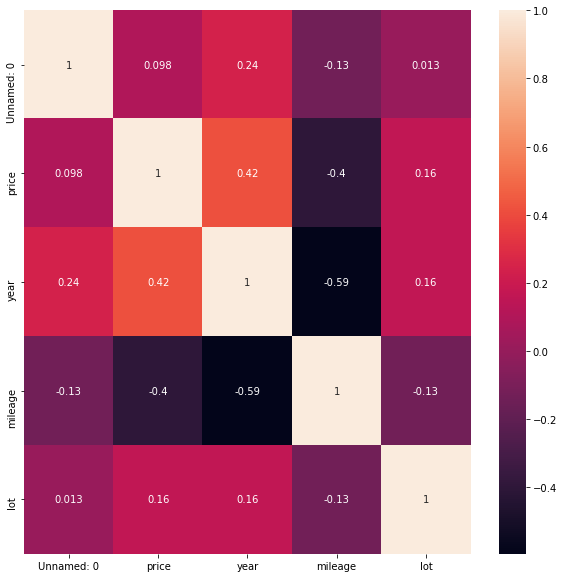

In [124]:
data_corr=data.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data_corr,annot=True)
plt.show()

# **Year-Price Scatter:**

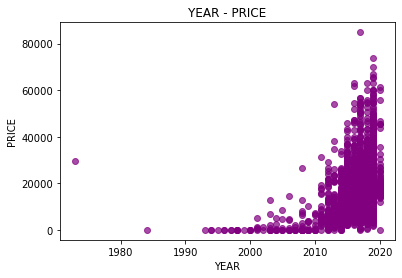

In [125]:
x=data.year
y=data.price
plt.scatter(x,y,color='purple',alpha=0.7)
plt.xlabel("YEAR")
plt.ylabel("PRICE")
plt.title("YEAR - PRICE")
plt.show()

# **Frequency of car color:**

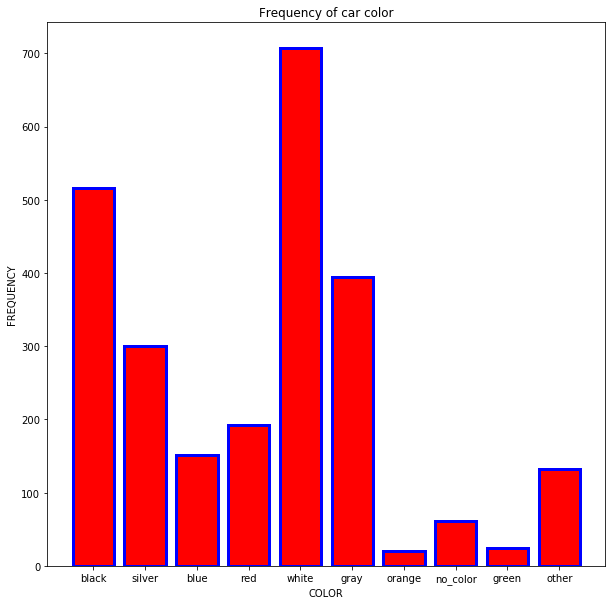

In [140]:
colors=np.array(data.color.unique())
colorArr=np.array([colors,np.zeros(len(colors))])
colorArr[0,]

#find the frequencies of all colors
for i in data.color: 
    a=0
    for j in colorArr[0,]:
        if j==i:
            colorArr[1,a]+=1
        a+=1
other=0
colorDict={}
b=0
#I called the frequency less than twenty as "other"
for x in colorArr[1,]:
    if x>=20:
        colorDict.update({(colorArr[0,b]):x})
    else:
        other+=x      
    b+=1
colorDict.update({"other":other})        
plt.figure(figsize=(10,10))
plt.bar(colorDict.keys(),colorDict.values(),color="r",edgecolor="blue",linewidth=3)
plt.xlabel("COLOR")
plt.ylabel("FREQUENCY")
plt.title("Frequency of car color")
plt.show()
